In [16]:
import torch
from load_data import *
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors


In [17]:
# Projector
# out_name = "cascade_projection_150_gamma_200"
out_name = "cascade_150"
dataset_name = 'GloVe'


In [ ]:
base_path = "./"
data_path = base_path + f'datasets/{dataset_name}'
output_path = base_path + 'outputs'

device = 'cpu'
X, Z, Y, _, _, _, X_test, Z_test, Y_test, z_id2label, y_id2label = load_data(dataset_name)

n, input_size = X.shape[0], X.shape[1]


In [ ]:
P = np.load("./outputs/eraser_GloVe_" + out_name + ".npy", allow_pickle=True).item().get("P")
P_ = np.load("./outputs/eraser_GloVe_" + out_name + ".npy", allow_pickle=True).item().get("P_")

# Check that P is an orthogonal projector
print('Idempotence:', np.linalg.norm(P@P - P).item())
print('Symmetry:', np.linalg.norm(P.T - P).item())

# Check that P_ is symmetric non-idempotent 
print('Idempotence (approx.):', np.linalg.norm(P_@P_ - P_).item())
print('Symmetry (approx.):', np.linalg.norm(P_.T - P_).item())


Idempotence: 0.0019396794959902763
Symmetry: 3.98477413909859e-06
Idempotence (approx.): 0.006956720724701881
Symmetry (approx.): 3.984375780419214e-06


In [20]:
# Réduction de dimension avec tSNE
tSNE = TSNE(n_components=2, random_state=42)
X_tsne= tSNE.fit_transform(X)

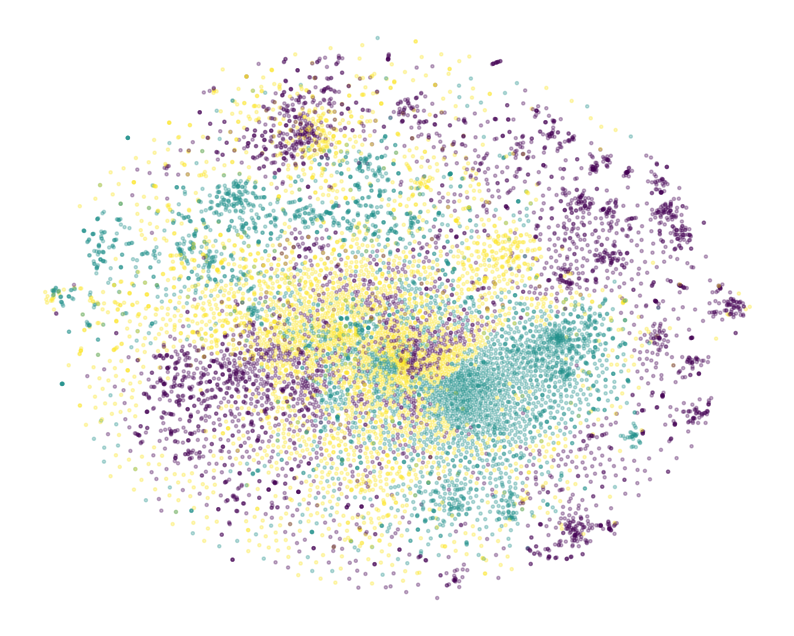

In [21]:
# Création du scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Z, cmap='viridis', alpha=0.3, s=5)
plt.axis('off')
plt.show()

In [22]:
# Réduction de dimension avec tSNE
X_ = X @ P
tSNE = TSNE(n_components=2, random_state=42)
X_tsne = tSNE.fit_transform(X_)

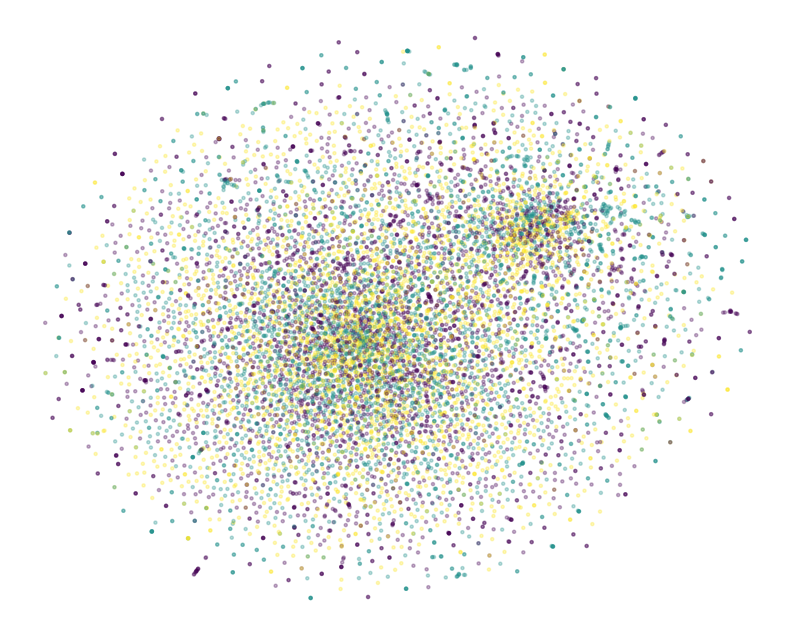

In [23]:
# Création du scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Z, cmap='viridis', alpha=0.3, s=5)
plt.axis('off')
plt.show()